In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques")

Skipping, found downloaded files in ".\house-prices-advanced-regression-techniques" (use force=True to force download)


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [5]:
data=''
def reset_data():
    global data
    data=pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
reset_data()

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
data.drop('Id',axis=1,inplace=True)

In [10]:
numerical=data.select_dtypes(include='number').columns.tolist()
categorical=data.select_dtypes(exclude='number').columns.tolist()

In [11]:
numerical

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [12]:
newCol=[]

In [13]:
def elaborate(name):
    print(data[name].describe())
    print('\n-------------\n[MISSING VALUES]')
    print(f'{np.round(data[name].isna().sum()*100/data.shape[0],2)}%')
colN=''
def getName():
    for col in numerical:
        yield col
gen=getName()

def updateName():
    global colN,gen
    colN=next(gen)
    print(f"---------[[[{colN}]]]--------")
    elaborate(colN)

In [14]:
updateName()

---------[[[MSSubClass]]]--------
count    1459.000000
mean       57.378341
std        42.746880
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [15]:
updateName()

---------[[[LotFrontage]]]--------
count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64

-------------
[MISSING VALUES]
15.56%


In [16]:
data[colN].fillna(data[colN].median(),inplace=True)

In [17]:
updateName()

---------[[[LotArea]]]--------
count     1459.000000
mean      9819.161069
std       4955.517327
min       1470.000000
25%       7391.000000
50%       9399.000000
75%      11517.500000
max      56600.000000
Name: LotArea, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [18]:
updateName()

---------[[[OverallQual]]]--------
count    1459.000000
mean        6.078821
std         1.436812
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [19]:
updateName()

---------[[[OverallCond]]]--------
count    1459.000000
mean        5.553804
std         1.113740
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [20]:
updateName()

---------[[[YearBuilt]]]--------
count    1459.000000
mean     1971.357779
std        30.390071
min      1879.000000
25%      1953.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [21]:
updateName()

---------[[[YearRemodAdd]]]--------
count    1459.000000
mean     1983.662783
std        21.130467
min      1950.000000
25%      1963.000000
50%      1992.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [22]:
updateName()

---------[[[MasVnrArea]]]--------
count    1444.000000
mean      100.709141
std       177.625900
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1290.000000
Name: MasVnrArea, dtype: float64

-------------
[MISSING VALUES]
1.03%


In [23]:
data[colN].fillna(data[colN].median(),inplace=True)

In [24]:
conditions=[
    data[colN]==0,
    (data[colN]>0)&(data[colN]<=200),
    (data[colN]>200)&(data[colN]<=400),
    (data[colN]>400)&(data[colN]<=600),
    (data[colN]>600)&(data[colN]<=800),
    (data[colN]>800)&(data[colN]<=1000),
    (data[colN]>1000)&(data[colN]<=1200),
    (data[colN]>1200)&(data[colN]<=1400),
    (data[colN]>1400)&(data[colN]<=1600)
]

choice=[
    0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8
]

In [25]:
data[colN]=np.select(conditions,choice,default=0)

In [26]:
elaborate(colN)

count    1459.000000
mean        0.694311
std         1.082870
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         7.000000
Name: MasVnrArea, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [27]:
updateName()

---------[[[BsmtFinSF1]]]--------
count    1458.000000
mean      439.203704
std       455.268042
min         0.000000
25%         0.000000
50%       350.500000
75%       753.500000
max      4010.000000
Name: BsmtFinSF1, dtype: float64

-------------
[MISSING VALUES]
0.07%


In [28]:
data[colN].fillna(data[colN].median(),inplace=True)

In [29]:
updateName()

---------[[[BsmtFinSF2]]]--------
count    1458.000000
mean       52.619342
std       176.753926
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

-------------
[MISSING VALUES]
0.07%


In [30]:
data[colN].fillna(data[colN].median(),inplace=True)

In [31]:
conditions=[
    data[colN]==0,
    (data[colN]>0)&(data[colN]<=200),
    (data[colN]>200)&(data[colN]<=400),
    (data[colN]>400)&(data[colN]<=600),
    (data[colN]>600)&(data[colN]<=800),
    (data[colN]>800)&(data[colN]<=1000),
    (data[colN]>1000)&(data[colN]<=1200),
    (data[colN]>1200)&(data[colN]<=1400),
    (data[colN]>1400)&(data[colN]<=1600)
]

choice=[
    0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8
]

In [32]:
data[colN]=np.select(conditions,choice,default=0)

In [33]:
elaborate(colN)

count    1459.000000
mean        0.327622
std         1.026867
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: BsmtFinSF2, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [34]:
updateName()

---------[[[BsmtUnfSF]]]--------
count    1458.000000
mean      554.294925
std       437.260486
min         0.000000
25%       219.250000
50%       460.000000
75%       797.750000
max      2140.000000
Name: BsmtUnfSF, dtype: float64

-------------
[MISSING VALUES]
0.07%


In [35]:
data[colN].fillna(data[colN].median(),inplace=True)

In [36]:
updateName()

---------[[[TotalBsmtSF]]]--------
count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

-------------
[MISSING VALUES]
0.07%


In [37]:
data[colN].fillna(data[colN].median(),inplace=True)

In [38]:
data[colN]=np.where(data[colN]<=4000,data[colN],data['BsmtUnfSF']+data['BsmtFinSF2']*200+data['BsmtFinSF1'])

In [39]:
elaborate(colN)

count    1459.000000
mean     1046.078136
std       442.749327
min         0.000000
25%       784.000000
50%       988.000000
75%      1304.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [40]:
updateName()

---------[[[1stFlrSF]]]--------
count    1459.000000
mean     1156.534613
std       398.165820
min       407.000000
25%       873.500000
50%      1079.000000
75%      1382.500000
max      5095.000000
Name: 1stFlrSF, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [41]:
data[colN]=np.where(data[colN]<=4000, data[colN],data['2ndFlrSF'])

In [42]:
elaborate(colN)

count    1459.000000
mean     1153.042495
std       385.749042
min         0.000000
25%       872.500000
50%      1079.000000
75%      1382.000000
max      3820.000000
Name: 1stFlrSF, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [43]:
updateName()

---------[[[2ndFlrSF]]]--------
count    1459.000000
mean      325.967786
std       420.610226
min         0.000000
25%         0.000000
50%         0.000000
75%       676.000000
max      1862.000000
Name: 2ndFlrSF, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [44]:
updateName()

---------[[[LowQualFinSF]]]--------
count    1459.000000
mean        3.543523
std        44.043251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: LowQualFinSF, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [45]:
set(data[colN].tolist())

{0, 80, 108, 114, 140, 205, 259, 312, 362, 431, 436, 450, 512, 697, 1064}

In [46]:
conditions=[
    data[colN]==0,
    (data[colN]>0)&(data[colN]<=200),
    (data[colN]>200)&(data[colN]<=400),
    (data[colN]>400)&(data[colN]<=600)
]

choice=[
    0,
    1,
    2,
    3
]

In [47]:
data[colN]=np.select(conditions,choice,default=0)

In [48]:
elaborate(colN)

count    1459.00000
mean        0.01645
std         0.19529
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         3.00000
Name: LowQualFinSF, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [49]:
updateName()

---------[[[GrLivArea]]]--------
count    1459.000000
mean     1486.045922
std       485.566099
min       407.000000
25%      1117.500000
50%      1432.000000
75%      1721.000000
max      5095.000000
Name: GrLivArea, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [50]:
updateName()

---------[[[BsmtFullBath]]]--------
count    1457.000000
mean        0.434454
std         0.530648
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64

-------------
[MISSING VALUES]
0.14%


In [51]:
data[colN].fillna(data[colN].mode(),inplace=True)

In [52]:
updateName()

---------[[[BsmtHalfBath]]]--------
count    1457.000000
mean        0.065202
std         0.252468
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64

-------------
[MISSING VALUES]
0.14%


In [53]:
data[colN].fillna(data[colN].mode(),inplace=True)

In [54]:
updateName()

---------[[[FullBath]]]--------
count    1459.000000
mean        1.570939
std         0.555190
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: FullBath, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [55]:
updateName()

---------[[[HalfBath]]]--------
count    1459.000000
mean        0.377656
std         0.503017
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [56]:
updateName()

---------[[[BedroomAbvGr]]]--------
count    1459.000000
mean        2.854010
std         0.829788
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: BedroomAbvGr, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [57]:
updateName()

---------[[[KitchenAbvGr]]]--------
count    1459.000000
mean        1.042495
std         0.208472
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: KitchenAbvGr, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [58]:
updateName()

---------[[[TotRmsAbvGrd]]]--------
count    1459.000000
mean        6.385195
std         1.508895
min         3.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: TotRmsAbvGrd, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [59]:
updateName()

---------[[[Fireplaces]]]--------
count    1459.00000
mean        0.58122
std         0.64742
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         4.00000
Name: Fireplaces, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [60]:
updateName()

---------[[[GarageYrBlt]]]--------
count    1381.000000
mean     1977.721217
std        26.431175
min      1895.000000
25%      1959.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

-------------
[MISSING VALUES]
5.35%


In [61]:
data[colN]=np.where(data[colN].isna(),data['YearBuilt'],data[colN])

In [62]:
elaborate(colN)

count    1459.000000
mean     1976.000000
std        27.761773
min      1890.000000
25%      1958.000000
50%      1978.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [63]:
updateName()

---------[[[GarageCars]]]--------
count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

-------------
[MISSING VALUES]
0.07%


In [64]:
data[colN].fillna(data[colN].mode(),inplace=True)

In [65]:
updateName()

---------[[[GarageArea]]]--------
count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

-------------
[MISSING VALUES]
0.07%


In [65]:
np.corrcoef(data[colN],data['GarageCars'])

array([[1.        , 0.88247541],
       [0.88247541, 1.        ]])

In [66]:
data[colN].loc[data['GarageCars']==1].median()

288.0

In [66]:
q1=data[colN].quantile(0.25)
q3=data[colN].quantile(0.75)
irq=q3-q1

conditions=[
    ((data[colN] > q1 - 1.5 * irq) & (data[colN] < q3 + 1.5 * irq)),
    (data['GarageCars']==1)&((data[colN] <= q1 - 1.5 * irq) | (data[colN] >= q3 + 1.5 * irq)),
    (data['GarageCars']==2)&((data[colN] <= q1 - 1.5 * irq) | (data[colN] >= q3 + 1.5 * irq)),
    (data['GarageCars']==3)&((data[colN] <= q1 - 1.5 * irq) | (data[colN] >= q3 + 1.5 * irq)),
    (data['GarageCars']==4)&((data[colN] <= q1 - 1.5 * irq) | (data[colN] >= q3 + 1.5 * irq))
]

choice=[
    data[colN],
    data['GarageArea'].loc[data['GarageCars']==1].median(),
    data['GarageArea'].loc[data['GarageCars']==2].median(),
    data['GarageArea'].loc[data['GarageCars']==3].median(),
    data['GarageArea'].loc[data['GarageCars']==4].median()
]

In [67]:
data[colN]=np.select(conditions,choice,default=300)

In [68]:
elaborate(colN)

count    1459.000000
mean      467.530500
std       205.252268
min         0.000000
25%       316.500000
50%       479.000000
75%       576.000000
max       962.000000
Name: GarageArea, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [69]:
updateName()

---------[[[WoodDeckSF]]]--------
count    1459.000000
mean       93.174777
std       127.744882
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: WoodDeckSF, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [70]:
updateName()

---------[[[OpenPorchSF]]]--------
count    1459.000000
mean       48.313914
std        68.883364
min         0.000000
25%         0.000000
50%        28.000000
75%        72.000000
max       742.000000
Name: OpenPorchSF, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [71]:
updateName()

---------[[[EnclosedPorch]]]--------
count    1459.000000
mean       24.243317
std        67.227765
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1012.000000
Name: EnclosedPorch, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [72]:
set(data[colN].tolist())

{0,
 16,
 18,
 20,
 23,
 24,
 25,
 26,
 28,
 30,
 32,
 34,
 35,
 36,
 40,
 41,
 42,
 43,
 45,
 48,
 51,
 52,
 55,
 56,
 57,
 60,
 64,
 66,
 68,
 70,
 72,
 75,
 77,
 78,
 80,
 81,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 101,
 102,
 104,
 105,
 109,
 112,
 113,
 116,
 117,
 120,
 121,
 122,
 123,
 126,
 128,
 132,
 133,
 134,
 135,
 136,
 138,
 139,
 140,
 143,
 144,
 148,
 150,
 154,
 156,
 160,
 161,
 164,
 165,
 167,
 168,
 169,
 170,
 175,
 176,
 180,
 183,
 186,
 190,
 192,
 196,
 200,
 203,
 204,
 205,
 207,
 208,
 209,
 211,
 212,
 213,
 216,
 218,
 219,
 222,
 224,
 225,
 231,
 236,
 238,
 239,
 240,
 244,
 246,
 248,
 249,
 256,
 260,
 264,
 265,
 280,
 288,
 290,
 296,
 324,
 334,
 364,
 368,
 429,
 432,
 584,
 1012}

In [73]:
conditions=[
    data[colN]==0,
    (data[colN]>0)&(data[colN]<=200),
    (data[colN]>200)&(data[colN]<=400),
    (data[colN]>400)&(data[colN]<=600)
]

choice=[
    0,
    1,
    2,
    3
]

In [74]:
data[colN]=np.select(conditions,choice,default=0)

In [75]:
elaborate(colN)

count    1459.000000
mean        0.209047
std         0.494996
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: EnclosedPorch, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [76]:
updateName()

---------[[[3SsnPorch]]]--------
count    1459.000000
mean        1.794380
std        20.207842
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       360.000000
Name: 3SsnPorch, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [77]:
set(data[colN].tolist())

{0, 86, 120, 150, 153, 174, 176, 219, 224, 225, 255, 323, 360}

In [78]:
conditions=[
    data[colN]==0,
    (data[colN]>0)&(data[colN]<=200),
    (data[colN]>200)&(data[colN]<=400),
    (data[colN]>400)&(data[colN]<=600)
]

choice=[
    0,
    1,
    2,
    3
]

In [79]:
data[colN]=np.select(conditions,choice,default=0)

In [80]:
elaborate(colN)

count    1459.000000
mean        0.013023
std         0.145232
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: 3SsnPorch, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [81]:
updateName()

---------[[[ScreenPorch]]]--------
count    1459.000000
mean       17.064428
std        56.609763
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       576.000000
Name: ScreenPorch, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [82]:
set(data[colN].tolist())

{0,
 64,
 84,
 88,
 92,
 94,
 95,
 100,
 104,
 108,
 109,
 110,
 111,
 112,
 113,
 115,
 116,
 117,
 120,
 121,
 123,
 126,
 135,
 138,
 140,
 141,
 142,
 144,
 145,
 148,
 150,
 153,
 155,
 156,
 160,
 161,
 162,
 164,
 165,
 166,
 168,
 171,
 174,
 175,
 180,
 182,
 192,
 195,
 196,
 200,
 201,
 204,
 208,
 210,
 216,
 217,
 221,
 224,
 225,
 227,
 228,
 231,
 240,
 255,
 256,
 264,
 266,
 270,
 280,
 288,
 322,
 342,
 348,
 490,
 576}

In [83]:
conditions=[
    data[colN]==0,
    (data[colN]>0)&(data[colN]<=200),
    (data[colN]>200)&(data[colN]<=400),
    (data[colN]>400)&(data[colN]<=600)
]

choice=[
    0,
    1,
    2,
    3
]

In [84]:
data[colN]=np.select(conditions,choice,default=0)

In [85]:
elaborate(colN)

count    1459.000000
mean        0.124058
std         0.409545
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: ScreenPorch, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [86]:
updateName()

---------[[[PoolArea]]]--------
count    1459.000000
mean        1.744345
std        30.491646
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [87]:
set(data[colN].tolist())

{0, 144, 228, 368, 444, 561, 800}

In [88]:
conditions=[
    data[colN]==0,
]

choice=[
    0
]

In [89]:
data[colN]=np.select(conditions,choice,default=1)

In [90]:
elaborate(colN)

count    1459.000000
mean        0.004112
std         0.064018
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PoolArea, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [91]:
updateName()

---------[[[MiscVal]]]--------
count     1459.000000
mean        58.167923
std        630.806978
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [92]:
set(data[colN].tolist())

{0,
 80,
 300,
 400,
 420,
 450,
 455,
 460,
 490,
 500,
 600,
 650,
 700,
 750,
 900,
 1000,
 1200,
 1500,
 1512,
 2000,
 2500,
 3000,
 4500,
 6500,
 12500,
 17000}

In [93]:
updateName()

---------[[[MoSold]]]--------
count    1459.000000
mean        6.104181
std         2.722432
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64

-------------
[MISSING VALUES]
0.0%


In [94]:
updateName()

---------[[[YrSold]]]--------
count    1459.000000
mean     2007.769705
std         1.301740
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

-------------
[MISSING VALUES]
0.0%


END OF NUMERICAL DATA


STARTING WITH CATEGORICAL DATA

In [96]:
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [97]:
def CatElaborate():
    print(data[colN].describe())
    print('\n-------------\n[MISSING VALUES]')
    print(f'{np.round(data[colN].isna().sum()*100/data.shape[0],2)}%')
    print('\n-------------\n[FREQUENCIES]')
    print(data[colN].value_counts())
    sns.countplot(data[colN])
    
def getName():
    for col in categorical:
        yield col
gen=getName()

def updateName():
    global colN,gen
    colN=next(gen)
    print(f"---------[[[{colN}]]]--------")
    CatElaborate()

In [98]:
def nominalEncoding():
    global colN,data
    dummies=pd.get_dummies(data[colN],prefix=colN+'__')
    data=data.join(dummies)
    data.drop(colN,axis=1,inplace=True)
    print((dummies.shape)[1], 'columns added!')
    
def ordinalEncoding(*saved):
    global colN
    dic=create_dic(*saved)
    data[colN+'_Encoded']=data[colN].map(dic)
    data.drop(colN,axis=1,inplace=True)

master_encode_dic={}

saved_encoding={
    'ExNA':{
        'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0
    },
    'GLQNA':{
         "GLQ":6,"ALQ":5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0
    },
    'YN':{
        "Y":1,'N':0
    },
    'FinNA':{
         "Fin":3,"RFn":2,"Unf":1,"NA":0
    },
    'RegIR3':{
        'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0
    },
    'LvlLow':{
         'Lvl':3,'Bnk':2,'HLS':1,'Low':0
    },
    'GtlSev':{
        'Gtl':2,'Mod':1,'Sev':0
    },
    'GdNA':{
         'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0
    }
    
}

def create_dic(*saved):
    global data,master_encode_dic,saved_encoding,colN
    print(data[colN].unique())
    dic={}
    if saved[0]:
        print('Labeling Done')
        master_encode_dic[colN]=saved_encoding[saved[0]]
        return saved_encoding[saved[0]]
    for value in data[colN].unique():
        dic[value]=int(input(f"Label for {value}:"))
    print('Labeling Done')
    master_encode_dic[colN]=dic
    return dic
    
def Cat_missing(*value):
    if len(value)==0:
        data[colN].fillna('NA',inplace=True)
    else:
        data[colN].fillna(value[0],inplace=True)

---------[[[MSZoning]]]--------
count     1455
unique       5
top         RL
freq      1114
Name: MSZoning, dtype: object

-------------
[MISSING VALUES]
0.27%

-------------
[FREQUENCIES]
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


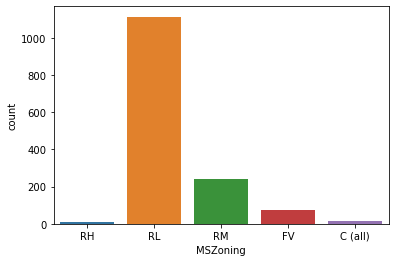

In [99]:
updateName()

In [100]:
Cat_missing()

In [101]:
nominalEncoding()

6 columns added!


---------[[[Street]]]--------
count     1459
unique       2
top       Pave
freq      1453
Name: Street, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
Pave    1453
Grvl       6
Name: Street, dtype: int64


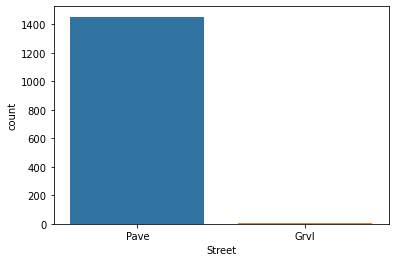

In [102]:
updateName()

In [103]:
nominalEncoding()

2 columns added!


---------[[[Alley]]]--------
count      107
unique       2
top       Grvl
freq        70
Name: Alley, dtype: object

-------------
[MISSING VALUES]
92.67%

-------------
[FREQUENCIES]
Grvl    70
Pave    37
Name: Alley, dtype: int64


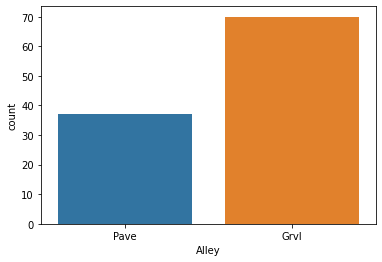

In [104]:
updateName()

In [105]:
Cat_missing()

In [106]:
nominalEncoding()

3 columns added!


---------[[[LotShape]]]--------
count     1459
unique       4
top        Reg
freq       934
Name: LotShape, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64


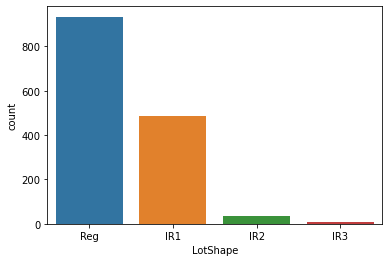

In [107]:
updateName()

In [108]:
ordinalEncoding('RegIR3')

['Reg' 'IR1' 'IR2' 'IR3']
Labeling Done


---------[[[LandContour]]]--------
count     1459
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64


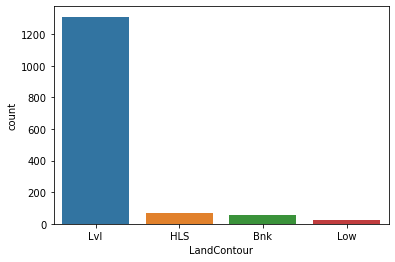

In [109]:
updateName()

In [110]:
ordinalEncoding('LvlLow')

['Lvl' 'HLS' 'Bnk' 'Low']
Labeling Done


---------[[[Utilities]]]--------
count       1457
unique         1
top       AllPub
freq        1457
Name: Utilities, dtype: object

-------------
[MISSING VALUES]
0.14%

-------------
[FREQUENCIES]
AllPub    1457
Name: Utilities, dtype: int64


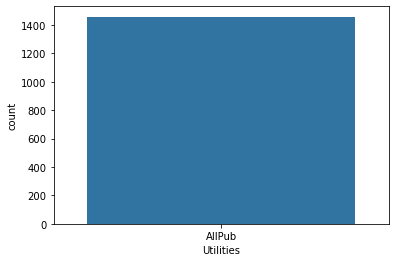

In [111]:
updateName()

In [112]:
Cat_missing()

In [113]:
nominalEncoding()

2 columns added!


---------[[[LotConfig]]]--------
count       1459
unique         5
top       Inside
freq        1081
Name: LotConfig, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64


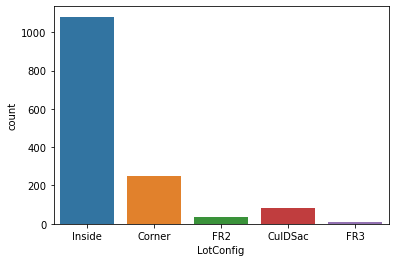

In [114]:
updateName()

In [115]:
nominalEncoding()

5 columns added!


---------[[[LandSlope]]]--------
count     1459
unique       3
top        Gtl
freq      1396
Name: LandSlope, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64


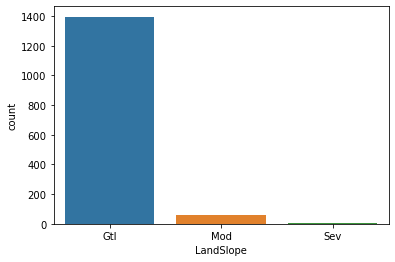

In [116]:
updateName()

In [117]:
ordinalEncoding('GtlSev')

['Gtl' 'Mod' 'Sev']
Labeling Done


---------[[[Neighborhood]]]--------
count      1459
unique       25
top       NAmes
freq        218
Name: Neighborhood, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64


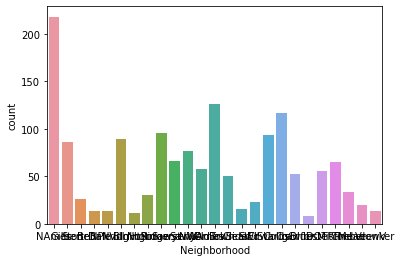

In [118]:
updateName()

In [119]:
nominalEncoding()

25 columns added!


---------[[[Condition1]]]--------
count     1459
unique       9
top       Norm
freq      1251
Name: Condition1, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNe         4
RRNn         4
Name: Condition1, dtype: int64


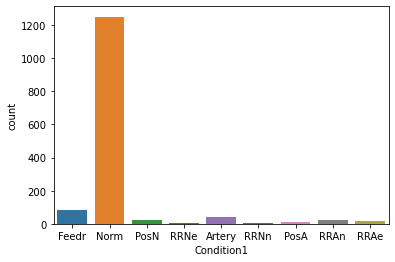

In [120]:
updateName()

In [121]:
nominalEncoding()

9 columns added!


---------[[[Condition2]]]--------
count     1459
unique       5
top       Norm
freq      1444
Name: Condition2, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
Norm      1444
Feedr        7
PosA         3
Artery       3
PosN         2
Name: Condition2, dtype: int64


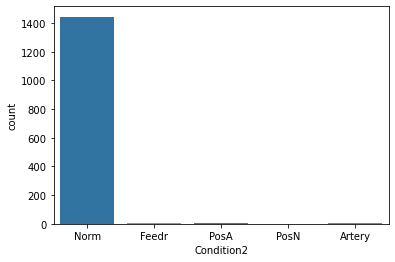

In [122]:
updateName()

In [123]:
nominalEncoding()

5 columns added!


---------[[[BldgType]]]--------
count     1459
unique       5
top       1Fam
freq      1205
Name: BldgType, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64


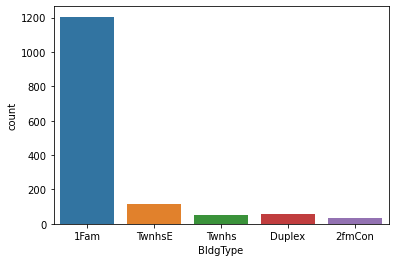

In [124]:
updateName()

In [125]:
nominalEncoding()

5 columns added!


---------[[[HouseStyle]]]--------
count       1459
unique         7
top       1Story
freq         745
Name: HouseStyle, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64


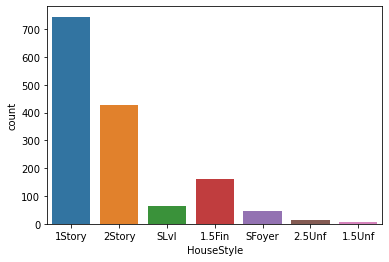

In [126]:
updateName()

In [127]:
nominalEncoding()

7 columns added!


---------[[[RoofStyle]]]--------
count      1459
unique        6
top       Gable
freq       1169
Name: RoofStyle, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
Gable      1169
Hip         265
Gambrel      11
Flat          7
Mansard       4
Shed          3
Name: RoofStyle, dtype: int64


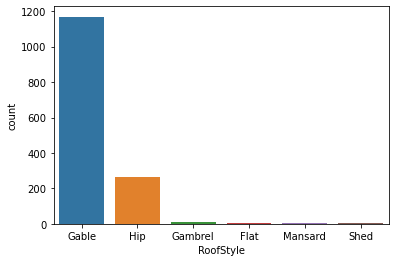

In [128]:
updateName()

In [129]:
nominalEncoding()

6 columns added!


---------[[[RoofMatl]]]--------
count        1459
unique          4
top       CompShg
freq         1442
Name: RoofMatl, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
CompShg    1442
Tar&Grv      12
WdShake       4
WdShngl       1
Name: RoofMatl, dtype: int64


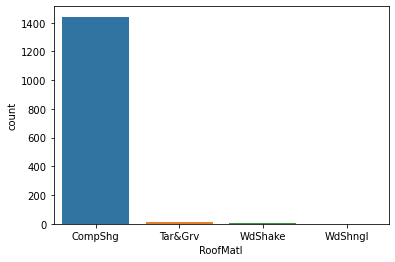

In [130]:
updateName()

In [131]:
nominalEncoding()

4 columns added!


---------[[[Exterior1st]]]--------
count        1458
unique         13
top       VinylSd
freq          510
Name: Exterior1st, dtype: object

-------------
[MISSING VALUES]
0.07%

-------------
[FREQUENCIES]
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64


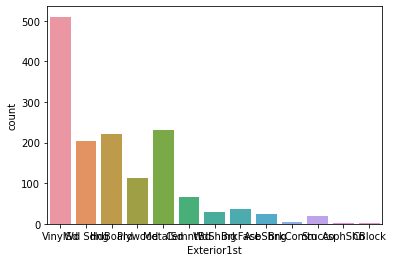

In [132]:
updateName()

In [135]:
Cat_missing()

In [136]:
nominalEncoding()

16 columns added!


---------[[[MasVnrType]]]--------
count     1443
unique       4
top       None
freq       878
Name: MasVnrType, dtype: object

-------------
[MISSING VALUES]
1.1%

-------------
[FREQUENCIES]
None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64


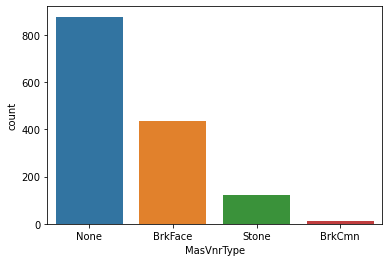

In [137]:
updateName()

In [138]:
Cat_missing()

In [139]:
nominalEncoding()

5 columns added!


---------[[[ExterQual]]]--------
count     1459
unique       4
top         TA
freq       892
Name: ExterQual, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
TA    892
Gd    491
Ex     55
Fa     21
Name: ExterQual, dtype: int64


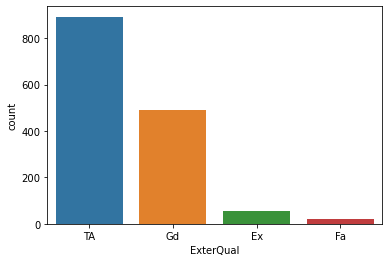

In [140]:
updateName()

In [136]:
Cat_missing('None')

In [141]:
nominalEncoding()

4 columns added!


---------[[[ExterCond]]]--------
count     1459
unique       5
top         TA
freq      1256
Name: ExterCond, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
TA    1256
Gd     153
Fa      39
Ex       9
Po       2
Name: ExterCond, dtype: int64


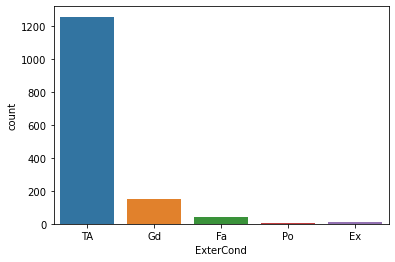

In [142]:
updateName()

In [143]:
ordinalEncoding('ExNA')

['TA' 'Gd' 'Fa' 'Po' 'Ex']
Labeling Done


---------[[[Foundation]]]--------
count      1459
unique        6
top       PConc
freq        661
Name: Foundation, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
PConc     661
CBlock    601
BrkTil    165
Slab       25
Stone       5
Wood        2
Name: Foundation, dtype: int64


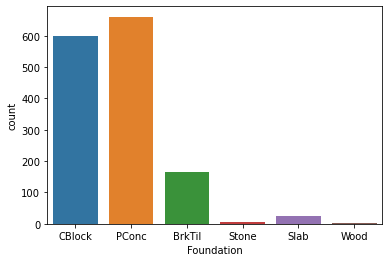

In [144]:
updateName()

In [145]:
ordinalEncoding('ExNA')

['CBlock' 'PConc' 'BrkTil' 'Stone' 'Slab' 'Wood']
Labeling Done


---------[[[BsmtQual]]]--------
count     1415
unique       4
top         TA
freq       634
Name: BsmtQual, dtype: object

-------------
[MISSING VALUES]
3.02%

-------------
[FREQUENCIES]
TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64


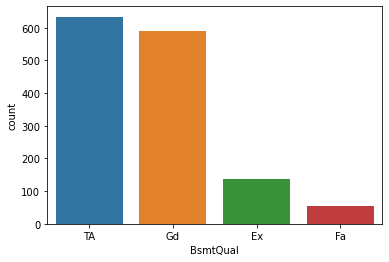

In [146]:
updateName()

In [147]:
Cat_missing()

In [148]:
nominalEncoding()

5 columns added!


---------[[[BsmtCond]]]--------
count     1414
unique       4
top         TA
freq      1295
Name: BsmtCond, dtype: object

-------------
[MISSING VALUES]
3.08%

-------------
[FREQUENCIES]
TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64


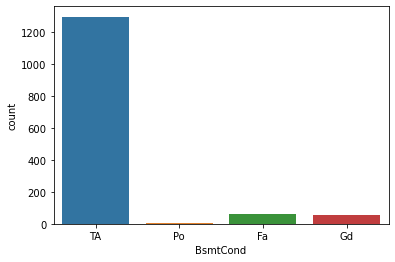

In [149]:
updateName()

In [150]:
Cat_missing()

In [151]:
ordinalEncoding('ExNA')

['TA' 'Po' 'Fa' 'Gd' 'NA']
Labeling Done


---------[[[BsmtExposure]]]--------
count     1415
unique       4
top         No
freq       951
Name: BsmtExposure, dtype: object

-------------
[MISSING VALUES]
3.02%

-------------
[FREQUENCIES]
No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64


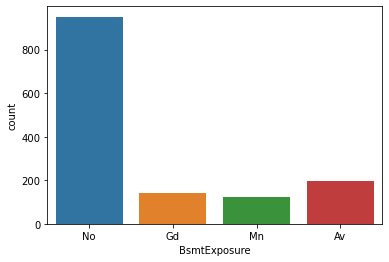

In [152]:
updateName()

In [153]:
Cat_missing()

In [154]:
ordinalEncoding('ExNA')

['No' 'Gd' 'Mn' 'Av' 'NA']
Labeling Done


---------[[[BsmtFinType1]]]--------
count     1417
unique       6
top        GLQ
freq       431
Name: BsmtFinType1, dtype: object

-------------
[MISSING VALUES]
2.88%

-------------
[FREQUENCIES]
GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64


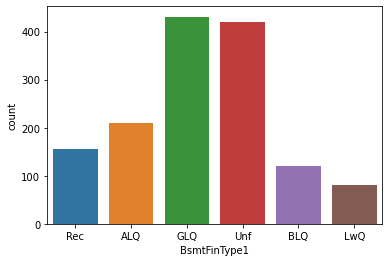

In [155]:
updateName()

In [156]:
Cat_missing()

In [157]:
ordinalEncoding('GdNA')

['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' 'NA']
Labeling Done


---------[[[BsmtFinType2]]]--------
count     1417
unique       6
top        Unf
freq      1237
Name: BsmtFinType2, dtype: object

-------------
[MISSING VALUES]
2.88%

-------------
[FREQUENCIES]
Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64


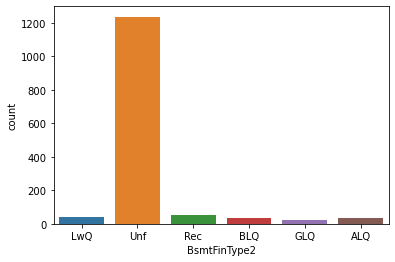

In [158]:
updateName()

In [159]:
Cat_missing()

In [160]:
ordinalEncoding('GLQNA')

['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' 'NA']
Labeling Done


---------[[[Heating]]]--------
count     1459
unique       4
top       GasA
freq      1446
Name: Heating, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
GasA    1446
GasW       9
Grav       2
Wall       2
Name: Heating, dtype: int64


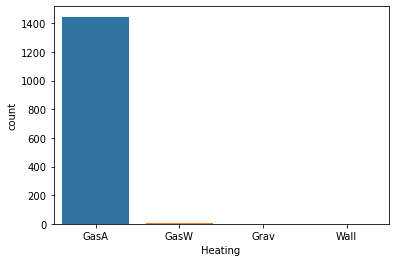

In [161]:
updateName()

In [162]:
Cat_missing()

In [163]:
ordinalEncoding('GLQNA')

['GasA' 'GasW' 'Grav' 'Wall']
Labeling Done


---------[[[HeatingQC]]]--------
count     1459
unique       5
top         Ex
freq       752
Name: HeatingQC, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
Ex    752
TA    429
Gd    233
Fa     43
Po      2
Name: HeatingQC, dtype: int64


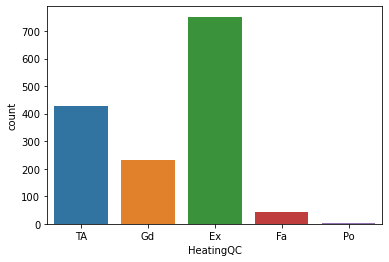

In [164]:
updateName()

In [165]:
nominalEncoding()

5 columns added!


---------[[[CentralAir]]]--------
count     1459
unique       2
top          Y
freq      1358
Name: CentralAir, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
Y    1358
N     101
Name: CentralAir, dtype: int64


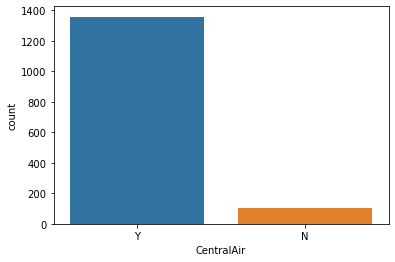

In [166]:
updateName()

In [167]:
ordinalEncoding('ExNA')

['Y' 'N']
Labeling Done


---------[[[Electrical]]]--------
count      1459
unique        4
top       SBrkr
freq       1337
Name: Electrical, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64


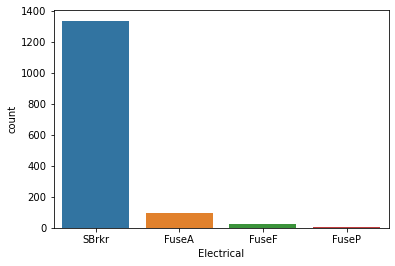

In [168]:
updateName()

In [169]:
ordinalEncoding('YN')

['SBrkr' 'FuseA' 'FuseF' 'FuseP']
Labeling Done


---------[[[KitchenQual]]]--------
count     1458
unique       4
top         TA
freq       757
Name: KitchenQual, dtype: object

-------------
[MISSING VALUES]
0.07%

-------------
[FREQUENCIES]
TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64


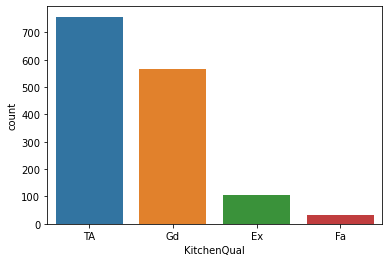

In [170]:
updateName()

In [171]:
Cat_missing('Mix')

In [172]:
nominalEncoding()

5 columns added!


---------[[[KitchenQual]]]--------
count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


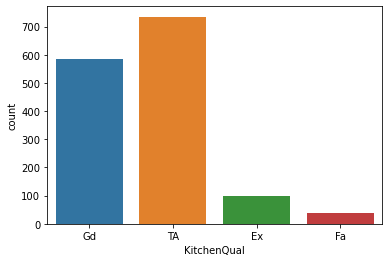

In [168]:
updateName()

In [169]:
ordinalEncoding('ExNA')

['Gd' 'TA' 'Ex' 'Fa']
Labeling Done


---------[[[Functional]]]--------
count     1460
unique       7
top        Typ
freq      1360
Name: Functional, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


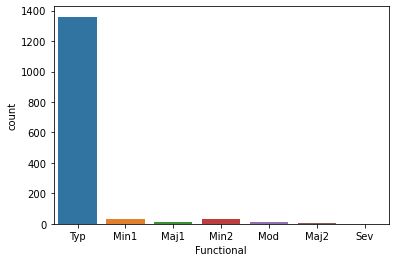

In [170]:
updateName()

In [171]:
nominalEncoding()

7 columns added!


---------[[[FireplaceQu]]]--------
count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

-------------
[MISSING VALUES]
47.26%

-------------
[FREQUENCIES]
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


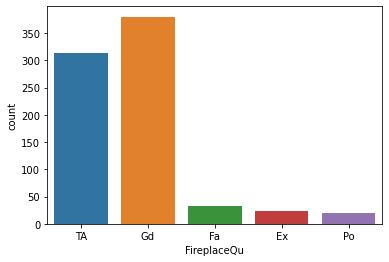

In [172]:
updateName()

In [173]:
Cat_missing()

In [174]:
ordinalEncoding('ExNA')

['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Labeling Done


---------[[[GarageType]]]--------
count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

-------------
[MISSING VALUES]
5.55%

-------------
[FREQUENCIES]
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


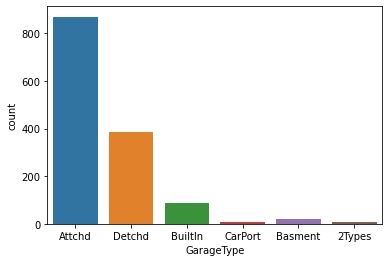

In [175]:
updateName()

In [176]:
Cat_missing()

In [177]:
nominalEncoding()

7 columns added!


---------[[[GarageFinish]]]--------
count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object

-------------
[MISSING VALUES]
5.55%

-------------
[FREQUENCIES]
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


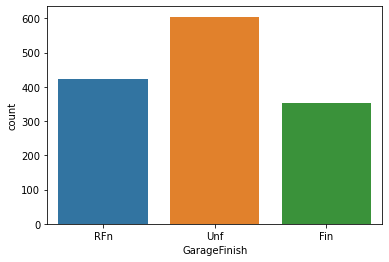

In [178]:
updateName()

In [179]:
Cat_missing()

In [180]:
ordinalEncoding('FinNA')

['RFn' 'Unf' 'Fin' 'NA']
Labeling Done


---------[[[GarageQual]]]--------
count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object

-------------
[MISSING VALUES]
5.55%

-------------
[FREQUENCIES]
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


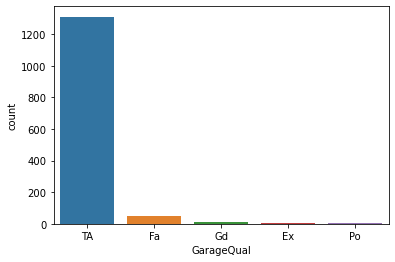

In [181]:
updateName()

In [182]:
Cat_missing()

In [183]:
ordinalEncoding('ExNA')

['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']
Labeling Done


---------[[[GarageCond]]]--------
count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object

-------------
[MISSING VALUES]
5.55%

-------------
[FREQUENCIES]
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


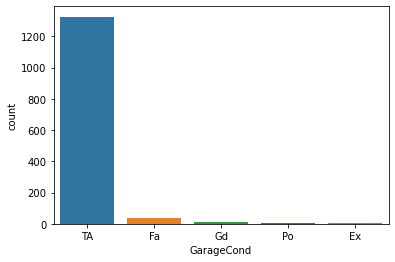

In [184]:
updateName()

In [185]:
Cat_missing()

In [186]:
ordinalEncoding('ExNA')

['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']
Labeling Done


---------[[[PavedDrive]]]--------
count     1460
unique       3
top          Y
freq      1340
Name: PavedDrive, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


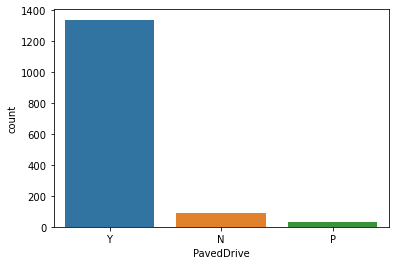

In [187]:
updateName()

In [188]:
nominalEncoding()

3 columns added!


---------[[[PoolQC]]]--------
count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object

-------------
[MISSING VALUES]
99.52%

-------------
[FREQUENCIES]
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


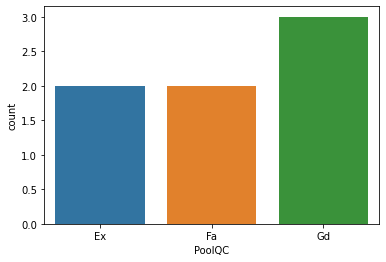

In [189]:
updateName()

In [190]:
Cat_missing()

In [191]:
ordinalEncoding('ExNA')

['NA' 'Ex' 'Fa' 'Gd']
Labeling Done


---------[[[Fence]]]--------
count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object

-------------
[MISSING VALUES]
80.75%

-------------
[FREQUENCIES]
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


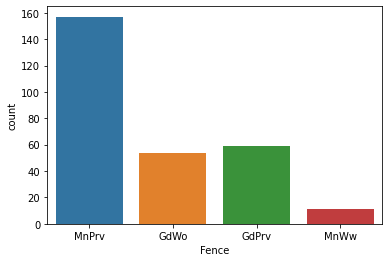

In [192]:
updateName()

In [193]:
Cat_missing()

In [194]:
nominalEncoding()

5 columns added!


---------[[[MiscFeature]]]--------
count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object

-------------
[MISSING VALUES]
96.3%

-------------
[FREQUENCIES]
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


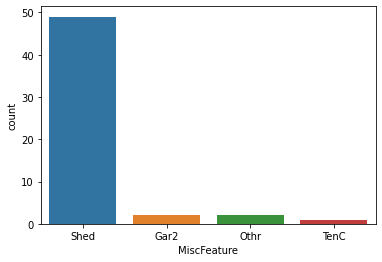

In [195]:
updateName()

In [196]:
Cat_missing()

In [197]:
nominalEncoding()

5 columns added!


---------[[[SaleType]]]--------
count     1460
unique       9
top         WD
freq      1267
Name: SaleType, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


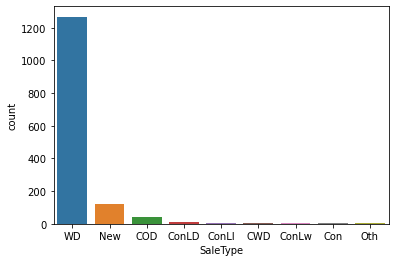

In [198]:
updateName()

In [199]:
nominalEncoding()

9 columns added!


---------[[[SaleCondition]]]--------
count       1460
unique         6
top       Normal
freq        1198
Name: SaleCondition, dtype: object

-------------
[MISSING VALUES]
0.0%

-------------
[FREQUENCIES]
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


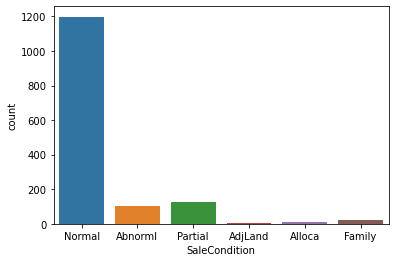

In [200]:
updateName()

In [201]:
nominalEncoding()

6 columns added!


Done with all columns

In [202]:
master_encode_dic

{'LotShape': {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0},
 'LandContour': {'Lvl': 3, 'Bnk': 2, 'HLS': 1, 'Low': 0},
 'LandSlope': {'Gtl': 2, 'Mod': 1, 'Sev': 0},
 'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
 'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
 'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
 'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
 'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
 'BsmtFinType1': {'GLQ': 6,
  'ALQ': 5,
  'BLQ': 4,
  'Rec': 3,
  'LwQ': 2,
  'Unf': 1,
  'NA': 0},
 'BsmtFinType2': {'GLQ': 6,
  'ALQ': 5,
  'BLQ': 4,
  'Rec': 3,
  'LwQ': 2,
  'Unf': 1,
  'NA': 0},
 'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
 'CentralAir': {'Y': 1, 'N': 0},
 'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
 'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
 'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA'

In [203]:
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType___ConLw,SaleType___New,SaleType___Oth,SaleType___WD,SaleCondition___Abnorml,SaleCondition___AdjLand,SaleCondition___Alloca,SaleCondition___Family,SaleCondition___Normal,SaleCondition___Partial
0,6.0,65.0,8450.0,7,5,2003,2003,1,706.0,0,...,0,0,0,1,0,0,0,0,1,0
1,1.0,80.0,9600.0,6,8,1976,1976,0,978.0,0,...,0,0,0,1,0,0,0,0,1,0
2,6.0,68.0,11250.0,7,5,2001,2002,1,486.0,0,...,0,0,0,1,0,0,0,0,1,0
3,7.0,60.0,9550.0,7,5,1915,1970,0,216.0,0,...,0,0,0,1,1,0,0,0,0,0
4,6.0,84.0,14260.0,8,5,2000,2000,2,655.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6.0,62.0,7917.0,6,5,1999,2000,0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1.0,85.0,13175.0,6,6,1978,1988,1,790.0,1,...,0,0,0,1,0,0,0,0,1,0
1457,7.0,66.0,9042.0,7,9,1941,2006,0,275.0,0,...,0,0,0,1,0,0,0,0,1,0
1458,1.0,68.0,9717.0,5,6,1950,1996,0,49.0,6,...,0,0,0,1,0,0,0,0,1,0


# EDA AND DATA ENGINEERING ENDS HERE!!!! ---------------------------------

In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [205]:
ss=StandardScaler()
data=pd.DataFrame(ss.fit_transform(data.values),index=data.index,columns=data.columns)
y=data['SalePrice']
data.drop('SalePrice',inplace=True,axis=1)
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.25)

In [206]:
from sklearn import metrics

In [207]:
from sklearn.ensemble import RandomForestRegressor

In [208]:
random_forrest=RandomForestRegressor()

In [209]:
random_forrest.fit(X_train,y_train)

RandomForestRegressor()

In [210]:
pred=random_forrest.predict(X_test)

In [211]:
metrics.mean_squared_error(y_test,pred)

0.10629697778608029

In [212]:
import pickle

In [213]:
pickle.dump(random_forrest,open('C:/Users/SPANDE32/Untitled Folder/house-prices-advanced-regression-techniques/model.hdf5','wb'))